In [27]:
# import dependencies
import numpy as np
np.random.seed(0)  
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from collections import Counter
from sklearn. model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [28]:
# load the dataset
df = pd.read_csv('data/ohe_data.csv',index_col = False)

In [4]:
# display first 5 rows
df.head(2)

,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,1,2016-02-08 00:37:08,40.10891,-83.09286,42.1,58.0,29.76,10.0,10.4,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2016-02-08 05:56:20,39.86542,-84.06280,36.9,91.0,29.68,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# drop columns deemed uncessary.
df.drop(columns = ['Unnamed: 0','Start_Time','Start_Lat','Start_Lng'],axis = 1,inplace = True)

In [6]:
# columns to encode
cat_columns = ['Sunrise_Sunset', 'Amenity','Bump','Crossing','Give_Way','Junction',
              'No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Sunrise_Sunset']

In [7]:
#Converting all Non-Numerical Columns to Numerical
'''The code below creates a label encoder object for each of the categorical columns in the dataset. 
It then transforms the values in those columns using the label encoder objects.'''
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        df[col] = globals()['LE_{}'.format(col)].fit_transform(df[col])
df.head()   

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,42.1,58.0,29.76,10.0,10.4,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,36.9,91.0,29.68,10.0,0.0,0.02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,36.0,97.0,29.70,10.0,0.0,0.02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,39.0,55.0,29.65,10.0,0.0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,37.0,93.0,29.69,10.0,10.4,0.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# train, test split
X= df.drop('Severity', axis =1 )
y = df['Severity']
# split train, test
X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.30,stratify = y, random_state=42)

In [12]:
# check the baseline
y.value_counts(normalize = True)

0    0.899991
1    0.100009
Name: Severity, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

print('Logistic Model Accuracy : ', log_model.score(X_test, y_test)*100, '%')

prediction = log_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

In [ ]:
# Decision Tree classification

from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(X_train, y_train)

print('Decision Tree Model Accuracy : ', decision_model.score(X_test, y_test)*100, '%')

prediction = decision_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))

print('\nClassification report:')      
print(classification_report(y_test, prediction))

### Balancing dataset


#### MinMax scale where datapoints fall in 0 or 1.

In [ ]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(X_test), columns=X_test.columns)

In [ ]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [ ]:
# Original majority and minority class
y_train.value_counts(normalize=True)*100

In [ ]:
# after using SMOTE 
y_train_oversam.value_counts(normalize=True)*100

### Machine Learning Model after Balancing

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression(max_iter = 40)
log_model.fit(x_train_oversam, y_train_oversam)

print('Logistic Model Accuracy : ', log_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = log_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

In [ ]:
# Decision Tree classification

from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train_oversam, y_train_oversam)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = decision_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

### Using random sample since it is difficult to process the whole dataset.

In [8]:
df_sample = df.sample(n=1000000)

In [9]:
df_sample.shape

(1000000, 130)

In [10]:
# train, test split
X= df_sample.drop('Severity', axis =1 )
y = df_sample['Severity']
# split train, test
X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.30,stratify = y, random_state=42)

In [13]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(X_test), columns=X_test.columns)

In [14]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [31]:
# Original majority and minority class
y_train.value_counts(normalize=True)*100

0    89.965714
1    10.034286
Name: Severity, dtype: float64

In [32]:
# after using SMOTE 
y_train_oversam.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: Severity, dtype: float64

In [33]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression(max_iter = 40,solver= 'liblinear')
log_model.fit(x_train_oversam, y_train_oversam)

print('Logistic Model Accuracy : ', log_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = log_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Logistic Model Accuracy :  82.81122057673853 %

Confusion matrix :
[[220589  49308]
 [ 43476 226421]]

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83    269897
           1       0.82      0.84      0.83    269897

    accuracy                           0.83    539794
   macro avg       0.83      0.83      0.83    539794
weighted avg       0.83      0.83      0.83    539794



In [34]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=100,
                                            max_depth=4,
                                            min_samples_leaf=6)

RandomForest_model.fit(x_train_oversam, y_train_oversam)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = RandomForest_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Random Forest Model Accuracy :  81.83306965249706 %

Confusion matrix :
[[210743  59154]
 [ 38910 230987]]

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81    269897
           1       0.80      0.86      0.82    269897

    accuracy                           0.82    539794
   macro avg       0.82      0.82      0.82    539794
weighted avg       0.82      0.82      0.82    539794



In [35]:
# XGBoost  classification

from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(x_train_oversam, y_train_oversam)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = XGB_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

XGBoost Model Accuracy :  95.10405821480046 %

Confusion matrix :
[[260809   9088]
 [ 17340 252557]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95    269897
           1       0.97      0.94      0.95    269897

    accuracy                           0.95    539794
   macro avg       0.95      0.95      0.95    539794
weighted avg       0.95      0.95      0.95    539794



#### XGBoost gave the highest accuracy of all the models created.

In [25]:
'''fit an XGBoost classifier to the training data and computes the feature importances
Only get top 10 importance 
'''
model = XGBClassifier()
model.fit(x_train_oversam, y_train_oversam)
importances = pd.DataFrame(data={
    'Attribute': x_train_oversam.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances =importances.head(14)

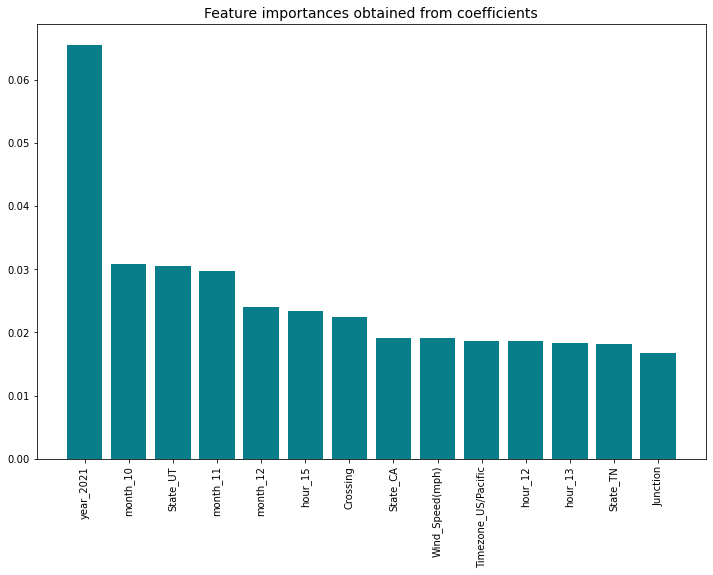

In [26]:
# create a bar chart that shows the feature importances obtained from the coefficients of the linear regression model
plt.figure(figsize=(12,8))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=14)
plt.xticks(rotation='vertical')
plt.show()

**References**:
- https://towardsdatascience.com/3-essential-ways-to-calculate-feature-importance-in-python-2f9149592155